# Analiza poatkov

V tej datoteki je analiza podatkov zbranih v csv datotekah v mapi \textit{'zajem-podatkov/obdelani-podatki'}. Odgovarjala bom na vprašanja zastavljena v datoteki \textit{README.md}.

In [22]:
import pandas as pd

In [23]:
avti = pd.read_csv('../zajem-podatkov/obdelani-podatki/izluscene_informacije.csv')

In [24]:
avti

,znamka,model,generacija,verzija,prvo leto proizvodnje,gorivo,poravnava motorja,prostornina motorja,moč motorja,prisilno polnenje motorja,pospesevanje,max hitrost,navor,emisije,poraba
0,Polestar,1,NaN,T8R,2020,hybrid_petrol,Transverse,1969,609,-,4.2,250.0,1000.0,15.0,1.3
1,Rover,100,NaN,1.1 ate97,1995,Petrol,Transverse,1120,60,NaN,14.8,155.0,90.0,148.0,6.2
2,Rover,100,NaN,1.1,1990,Petrol,Transverse,1120,60,NaN,14.8,155.0,90.0,141.0,5.9
3,Rover,100,NaN,1.4 GTi 16v MPI,1991,Petrol,Transverse,1396,103,NaN,9.5,190.0,127.0,165.0,6.9
4,Rover,100,NaN,1.4 GTi 16v,1990,Petrol,Transverse,1396,90,NaN,9.8,183.0,120.0,155.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Ford,F-150,NaN,5.4L V8 3V 4x4 5.5ft box SuperCab,2009,Petrol,Longitudinal,5408,314,NaN,NaN,NaN,495.0,NaN,NaN
182,Ford,F-150,NaN,5.4L V8 3V 4x4 6.5ft box Regular Cab,2009,Petrol,Longitudinal,5408,314,NaN,NaN,NaN,495.0,NaN,NaN
183,Ford,F-150,NaN,5.4L V8 3V 4x4 6.5ft box SuperCab,2009,Petrol,Longitudinal,5408,314,NaN,NaN,NaN,495.0,NaN,NaN
184,Ford,F-150,NaN,5.4L V8 3V 4x4 8ft box LWB SuperCab,2009,Petrol,Longitudinal,5408,314,NaN,NaN,NaN,495.0,NaN,NaN


## 1. Katera vrsta goriva je najpogosteje uporabljena?

Poglejmo najprej katere vrste goriva so sploh zastopane in preštejmo število pojavitev.

In [25]:
avti.gorivo.unique()

array(['hybrid_petrol', 'Petrol', 'Diesel'], dtype=object)

In [74]:
vrednosti = avti.gorivo.value_counts()
okvir_1 = {'Število' : vrednosti}
tabela_goriva = pd.DataFrame(okvir)
tabela_goriva

,zaokrožena velikost,Longitudinalna,Transverzalna
0,12.0,NaN,0
1,7.0,NaN,0
2,7.0,NaN,0
3,7.0,NaN,0
4,7.0,NaN,0
...,...,...,...
velikost,NaN,109.0,0
verzija,NaN,109.0,0
visina,NaN,109.0,0
zaokrožena velikost,NaN,109.0,0


<AxesSubplot:ylabel='Število'>

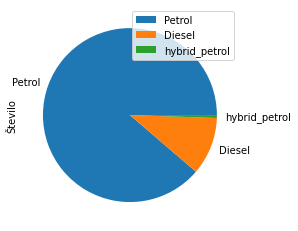

In [ ]:
tabela_goriva.plot.pie(y='Število')

Opazimo, da je bencin najbolj uporabljen.

## 2. Je poravnava motorja odvisna od velikosti vozila?

Združimo glavni csv s csv-jem dimenzij.

In [ ]:
dimenzije = pd.read_csv('../zajem-podatkov/obdelani-podatki/dimenzije.csv')
dimenzije

,verzija,visina,sirina,dolzina,teza
0,T8R,135.2,195.8,458.6,2250.0
1,1.1 ate97,138.0,156.0,356.0,806.0
2,1.1,138.0,156.0,352.0,806.0
3,1.4 GTi 16v MPI,138.0,156.0,352.0,865.0
4,1.4 GTi 16v,138.0,156.0,352.0,859.0
...,...,...,...,...,...
181,5.4L V8 3V 4x4 5.5ft box SuperCab,193.8,200.4,558.5,2452.0
182,5.4L V8 3V 4x4 6.5ft box Regular Cab,193.0,200.4,541.3,2298.0
183,5.4L V8 3V 4x4 6.5ft box SuperCab,192.8,200.4,558.5,2475.0
184,5.4L V8 3V 4x4 8ft box LWB SuperCab,194.8,200.4,635.8,2492.0


In [ ]:
avti_in_dimenzije = pd.merge(avti, dimenzije, on='verzija')
avti_in_dimenzije[['verzija', 'poravnava motorja', 'visina', 'sirina', 'dolzina']]

,verzija,poravnava motorja,visina,sirina,dolzina
0,T8R,Transverse,135.2,195.8,458.6
1,1.1 ate97,Transverse,138.0,156.0,356.0
2,1.1,Transverse,138.0,156.0,352.0
3,1.1,Transverse,138.0,156.0,356.0
4,1.1,Transverse,138.0,156.0,352.0
...,...,...,...,...,...
189,5.4L V8 3V 4x4 5.5ft box SuperCab,Longitudinal,193.8,200.4,558.5
190,5.4L V8 3V 4x4 6.5ft box Regular Cab,Longitudinal,193.0,200.4,541.3
191,5.4L V8 3V 4x4 6.5ft box SuperCab,Longitudinal,192.8,200.4,558.5
192,5.4L V8 3V 4x4 8ft box LWB SuperCab,Longitudinal,194.8,200.4,635.8


In [39]:
def velikost(v, s, d): return v * s * d

vrednosti = velikost(avti_in_dimenzije.visina / 100, 
                     avti_in_dimenzije.sirina / 100,
                     avti_in_dimenzije.dolzina / 100)

avti_in_dimenzije['velikost'] = vrednosti
tabela_velikosti = avti_in_dimenzije[['poravnava motorja', 'velikost']]
tabela_velikosti

,poravnava motorja,velikost
0,Transverse,12.140133
1,Transverse,7.663968
2,Transverse,7.577856
3,Transverse,7.663968
4,Transverse,7.577856
...,...,...
189,Longitudinal,21.690755
190,Longitudinal,20.935968
191,Longitudinal,21.578832
192,Longitudinal,24.820310


In [38]:
avti_in_dimenzije.groupby('poravnava motorja').mean()[['velikost']]

,velikost
poravnava motorja,
Longitudinal,19.163610
Transverse,8.619195


Predvidevamo, da so avti z longitudialno postavitvijo motorja večji. Poglejmo še razporeditev po številu avtov določenega razpona velikosti.

In [65]:
avti_in_dimenzije['zaokrožena velikost'] = avti_in_dimenzije.velikost // 1

tabela_zaokroženih_velikosti = avti_in_dimenzije.groupby(['zaokrožena velikost', 'poravnava motorja']).count()[['znamka']]
tabela_zaokroženih_velikosti

znamka
zaokrožena velikost poravnava motorja        
6.0                 Transverse              2
7.0                 Transverse             19
8.0                 Transverse             32
9.0                 Longitudinal            1
                    Transverse              3
10.0                Longitudinal            2
11.0                Longitudinal            1
                    Transverse              5
12.0                Longitudinal           17
                    Transverse              6
13.0                Longitudinal           15
20.0                Longitudinal           16
21.0                Longitudinal           10
22.0                Longitudinal           32
23.0                Longitudinal            3
24.0                Longitudinal           10
25.0                Longitudinal            2

poravnava motorja
Longitudinal    AxesSubplot(0.125,0.125;0.775x0.755)
Transverse      AxesSubplot(0.125,0.125;0.775x0.755)
Name: znamka, dtype: object

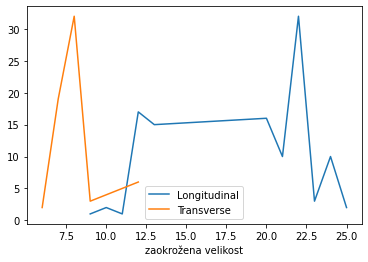

In [72]:
#tabela_zaokroženih_velikosti.plot(x='zaokrožena velikost', y='znamka')
t = tabela_zaokroženih_velikosti.reset_index()
t.set_index('zaokrožena velikost', inplace=True)
t.groupby('poravnava motorja')['znamka'].plot(legend=True)

Opazimo, da so transverzalne poravnave motorjev res značilne za manjša vozila, medtem ko so za večja bolj značilne longitudinalne. 